In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data={
    'PatientID':[1,2,3,4,5],
    'Age':[34,45,23,50,40],
    'Gender':['M', 'F','F','M','M'],
    'Diagnosis':['Diabets','Hypertension','Asthma','Diabetes','Hypertension']
}
df=pd.DataFrame(data)
df.head()

,PatientID,Age,Gender,Diagnosis
0,1,34,M,Diabets
1,2,45,F,Hypertension
2,3,23,F,Asthma
3,4,50,M,Diabetes
4,5,40,M,Hypertension


In [16]:
df['Gender']=df['Gender'].map({'M':0,'F':1})
df['Diagnosis']=df['Diagnosis'].map({'Asthma':0,'Hypertension':1,'Diabetes':2})
mod_df=pd.get_dummies(df,columns=['Diagnosis'])
mod_df.head()

,PatientID,Age,Gender,Diagnosis_0.0,Diagnosis_1.0,Diagnosis_2.0
0,1,34,0,0,0,0
1,2,45,1,0,1,0
2,3,23,1,1,0,0
3,4,50,0,0,0,1
4,5,40,0,0,1,0


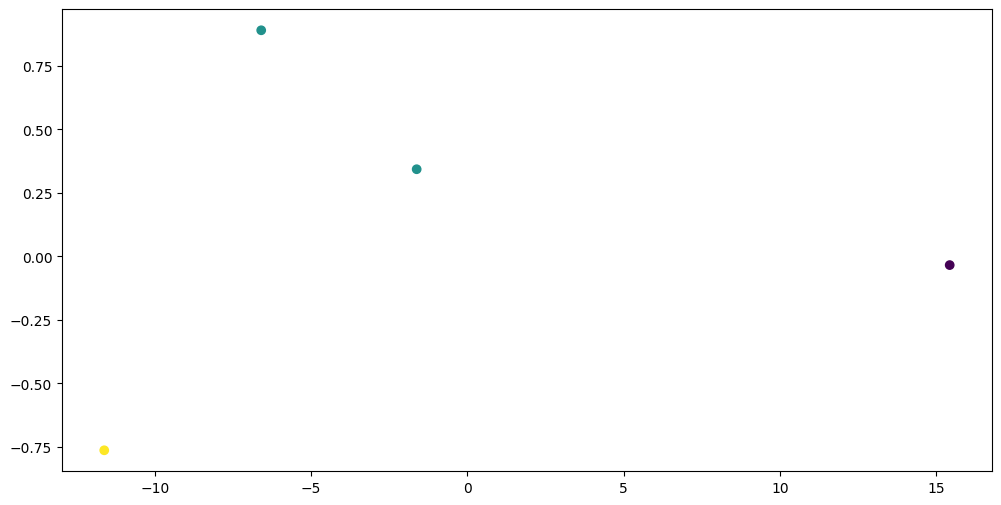

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_comp=pca.fit_transform(mod_df.drop('PatientID',axis=1))
plt.figure(figsize=(12,6))
plt.scatter(pca_comp[:,0],pca_comp[:,1], c=df['Diagnosis'])
plt.show()

In [21]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [23]:
unstructured_data=[
    "Patient has a history of hypertension and diabetes. Prescribed medication X.",
    "Asthma diagnosis confirmed. Patient advised to use inhaler daily.",
    "Hypertension patient. Needs regular monitoring of blood pressure.",
    "Diabetes patient. Recommended diet and exercise.",
    "Patient diagnosed with hypertension. Medication Y prescribed."
]


In [25]:
def preprocess_text(text):
    text=text.lower()
    text=re.sub(r'\d+', '',text)
    text=re.sub(r'\W',' ',text)
    text=' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

cleaned_notes=[preprocess_text(note) for note in unstructured_data]

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(max_features=10)
X_tfidf=vectorizer.fit_transform(cleaned_notes).toarray()

pd.DataFrame(X_tfidf,columns=vectorizer.get_feature_names_out()).head()

,advised,diabetes,hypertension,medication,monitoring,needs,patient,prescribed,pressure,recommended
0,0.00000,0.497649,0.413094,0.497649,0.0000,0.0000,0.293920,0.497649,0.0000,0.000000
1,0.90275,0.000000,0.000000,0.000000,0.0000,0.0000,0.430165,0.000000,0.0000,0.000000
2,0.00000,0.000000,0.349322,0.000000,0.5216,0.5216,0.248545,0.000000,0.5216,0.000000
3,0.00000,0.588732,0.000000,0.000000,0.0000,0.0000,0.347715,0.000000,0.0000,0.729718
4,0.00000,0.000000,0.476256,0.573740,0.0000,0.0000,0.338860,0.573740,0.0000,0.000000


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


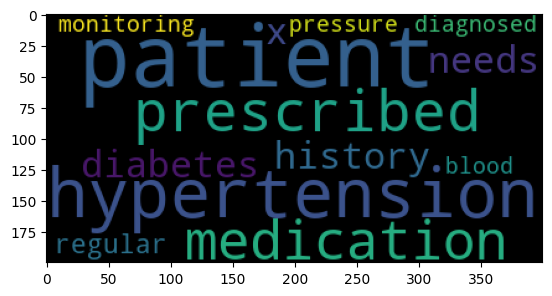

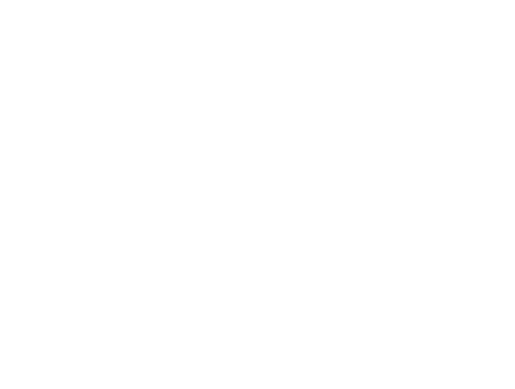

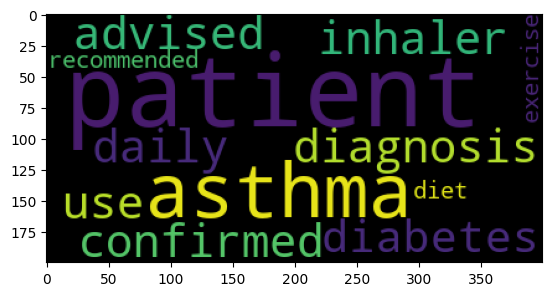

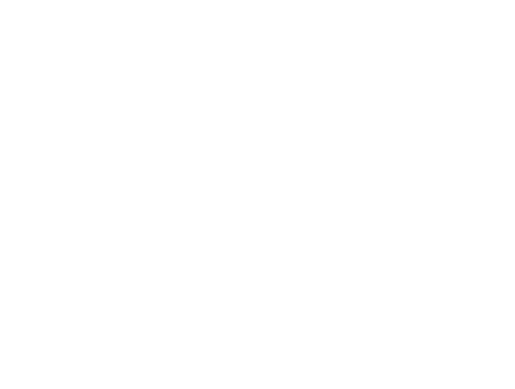

In [29]:
from sklearn.cluster import KMeans
from wordcloud import WordCloud
kmeans=KMeans(n_clusters=2).fit(X_tfidf)
for i in range(2):
    cluster_words=' '.join([cleaned_notes[j] for j in range(len(cleaned_notes)) if kmeans.labels_[j]==i])
    wordcloud=WordCloud().generate(cluster_words)
    plt.imshow(wordcloud)
    plt.show(wordcloud)
    plt.axis('off')
    plt.show()